## Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

**Цель исследования** - установить параметры, влияющие на стоимость квартир в Ленинградской области за последние несколько лет.

**Задачи**:

- проверить гипотезу о зависимости стоимости квартиры от площади квартиры;
- проверить гипотезу о зависимости стоимости квартиры от числа комнат;
- проверить гипотезу о зависимости стоимости квартиры от удаленности от центра;
- проверить гипотезу о зависимости стоимости квартиры от этажа, на котором расположена квартира;
- проверить гипотезу о зависимости стоимости квартиры от даты размещения объявления.
 
Входные данные — архив объявлений о продаже квартир в Ленинградской области сервиса Яндекc Недвижимость.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Результаты исследования позволят построить автоматизированную систему, отслеживающую аномалии и мошенническую деятельность.

**Содержание**




<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data =  pd.read_csv('/datasets/real_estate_data.csv', sep='\t')


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Посмотрим типы данных и кол-во ненулевых значений:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Также просмотрим уникальные значения, чтобы сразу выявить аномалии:

In [6]:
columns = data.columns
for c in columns:
    print(c.upper(), '\n', data[c].unique(), '\n')

TOTAL_IMAGES 
 [20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37] 

LAST_PRICE 
 [13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.] 

TOTAL_AREA 
 [108.    40.4   56.   ...  66.86 133.81  76.75] 

FIRST_DAY_EXPOSITION 
 ['2019-03-07T00:00:00' '2018-12-04T00:00:00' '2015-08-20T00:00:00' ...
 '2014-12-29T00:00:00' '2016-09-12T00:00:00' '2015-07-19T00:00:00'] 

ROOMS 
 [ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12] 

CEILING_HEIGHT 
 [  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06

### Вывод

Заметили следующее:

1. last_price - следует заменить на тип int, для удобства просмотра.
2. first_day_exposition - должен быть тип datetime.
3. ceiling_height - нулевые значения и аномально большие значения.
4. floors_total - должен быть тип int, количество этажей - целое значение, также нулевые значения.
5. is_apartment - должен быть тип bool + нулевые значения.
6. living_area, kitchen_area - нулевые значения.
7. balcony - нулевые значения, тип float следует заменить на int8, сэкономим память.
8. locality_name - нулевые значения.
9. airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest - нулевые значения.
10. parks_around3000, ponds_around3000  - тип должен быть int + нулевые значения.
11. days_exposition - тип должен быть int + нулевые значения.

## Предобработка данных

Теперь можно идти по списку и исправлять неточности.

1. Изменим цену на тип int:

In [7]:
data['last_price'] = data['last_price'].astype('int')

2. Переведем столбец с датой в формат даты без времени, т.к. время не указано:

In [8]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

3. Посмотрим информацию о столбце ceiling_height:

In [9]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Большие значения пока оставим как есть, медиана от среднего отличается не сильно из-за этих выбросов в выборке.

4. Посмотрим данные с пропущенными значениями в floors_total:

In [10]:
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000,65.2,2018-10-02,2,NaN,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033,28.1,2016-11-23,1,NaN,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348,70.8,2015-08-01,2,NaN,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191,93.6,2017-04-06,3,NaN,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000,39.0,2017-04-22,1,NaN,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000,63.5,2017-05-24,2,2.8,NaN,NaN,3,NaN,False,False,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160,64.5,2017-04-02,2,NaN,NaN,31.70,20,NaN,False,False,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263,110.4,2016-11-20,3,NaN,NaN,45.38,6,NaN,False,False,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872,123.3,2017-04-25,3,NaN,NaN,50.40,18,NaN,False,False,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Ничего общего не видно, пока оставим как есть.

5. Изменим тип данных и заполним  пропуски в is_apartment:

In [11]:
data['is_apartment'] = data['is_apartment'].astype('bool').fillna(False)

6. Пропуски в living_area и kitchen_area можно заполнить медианным значением, опираясь на общую площадь квартиры. 
Посмотрим, какой процент пропусков в этих столбцах от общего количества строк:

In [12]:
print('Пропуски в стоблце living_area составляют', round(data['living_area'].isna().sum()/len(data)*100, 2), '%')
print('Пропуски в стоблце kitchen_area составляют', round(data['kitchen_area'].isna().sum()/len(data)*100, 2), '%')

Пропуски в стоблце living_area составляют 8.03 %
Пропуски в стоблце kitchen_area составляют 9.61 %


Пропусков не так много, пока не будем тратить на это время.

7. Изменим тип данных и заполним  пропуски в balcony:

In [13]:
data['balcony'] = data['balcony'].fillna(0).astype('int8')

8. Пропущенные значения в locality_name не будем трогать, причина непонятна.

In [14]:
name_missing = data[data['locality_name'].isna()].index
data = data.drop(name_missing, axis=0)

9. Пропуски в airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest пока оставим как есть.

10. Изменим тип parks_around3000, ponds_around3000 и заполним пропуски:

In [15]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int8')
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int8')

11. Заменим пропуски в days_exposition и заменим тип данных:

In [16]:
data[data['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
7,5,7915000,71.60,2019-04-18,2,NaN,24.0,NaN,22,True,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN
44,13,5350000,40.00,2018-11-18,1,NaN,22.0,NaN,3,True,False,False,NaN,1,Санкт-Петербург,30471.0,11603.0,1,620.0,1,1152.0,NaN
45,17,5200000,50.60,2018-12-02,2,2.65,9.0,30.3,7,True,False,False,7.00,0,Санкт-Петербург,30011.0,12872.0,0,NaN,0,NaN,NaN
46,17,6600000,52.10,2019-01-31,2,2.60,24.0,29.7,9,True,False,False,8.30,2,Санкт-Петербург,15114.0,12702.0,0,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000,145.00,2018-11-02,4,3.00,26.0,71.4,17,True,False,False,15.60,0,Санкт-Петербург,11827.0,11459.0,0,NaN,0,NaN,NaN
23685,15,2490000,31.00,2019-01-24,1,2.50,5.0,17.3,5,True,False,False,5.60,1,Ломоносов,48393.0,51818.0,0,NaN,0,NaN,NaN
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,True,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,True,False,False,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN


Проверим, есть ли в данных явные дубликаты:

In [17]:
data.duplicated().sum() 

0

Посмотрим на результат:

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int32         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

Удалось уменьшить количество пропусков и сэкономить память, изменив типы данных.

In [19]:
data['total_area'] = data['total_area'].astype('float32')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int32         
 2   total_area            23650 non-null  float32       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

## Расчёты и добавление результатов в таблицу

1. Рассчитаем и добавим в таблицу цену за квадратный метр.

In [20]:
data['sq_meter_price'] = (data['last_price'] / data['total_area']).astype('int')

2. Добавим столбцы с днем недели, месяцем и годом публикации объявлений.

In [21]:
data['weekday_exp'] = data['first_day_exposition'].dt.weekday
data['month_exp'] = data['first_day_exposition'].dt.month
data['year_exp'] = data['first_day_exposition'].dt.year

3. Добавим категоризацию этажей квартиры.

In [22]:
def floor(df):
    total = df['floors_total']
    floor = df['floor']
    if floor == 1:
        return 'первый'
    elif floor == total:
        return 'последний'
    else:
        return 'другой'
    
data['floor_category'] = data.apply(floor, axis = 1)

4. Найдем соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [23]:
data['living_area_ratio'] = data['living_area'] / data['total_area']
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

Посмотрим результат:

In [24]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,weekday_exp,month_exp,year_exp,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.000000,2019-03-07,3,2.70,16.0,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.400002,2018-12-04,1,NaN,11.0,18.60,1,True,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.000000,2015-08-20,2,NaN,5.0,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.000000,2015-07-24,3,NaN,14.0,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176,4,7,2015,другой,NaN,NaN
4,2,10000000,100.000000,2018-06-19,2,3.03,14.0,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.400000,2018-09-10,1,NaN,12.0,14.40,5,True,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065,0,9,2018,другой,0.473684,0.299342
6,6,3700000,37.299999,2017-11-02,1,NaN,26.0,10.60,6,True,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195,3,11,2017,другой,0.284182,0.386059
7,5,7915000,71.599998,2019-04-18,2,NaN,24.0,NaN,22,True,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544,3,4,2019,другой,NaN,0.263966
8,20,2900000,33.160000,2018-05-23,1,NaN,27.0,15.43,26,True,False,False,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.0,87454,2,5,2018,другой,0.465320,0.265682
9,18,5400000,61.000000,2017-02-26,3,2.50,9.0,43.60,7,True,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524,6,2,2017,другой,0.714754,0.106557


## Исследовательский анализ данных

### Изучение параметров общей выборки

<b>Шаг 1.</b>
Изучим площадь, цену, число комнат, высоту потолков. 

count    23650.000000
mean        60.329212
std         35.661705
min         12.000000
25%         40.000000
50%         52.000000
75%         69.699997
max        900.000000
Name: total_area, dtype: float64

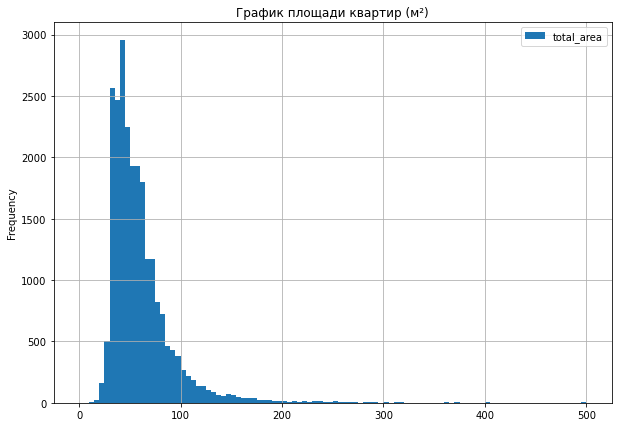

In [25]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (10,7), range = (0,500), title='График площади квартир (м²)')
data['total_area'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

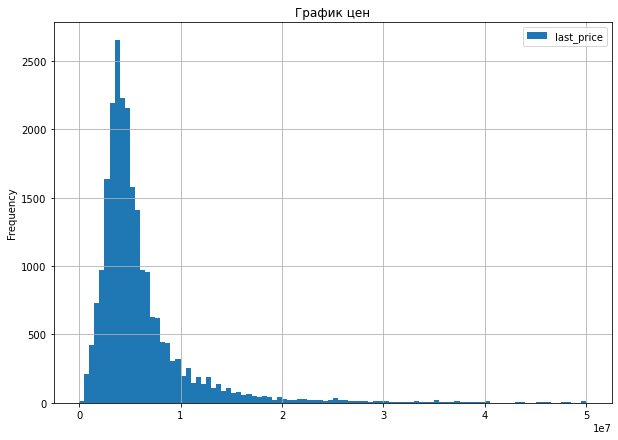

In [26]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,50000000), figsize = (10,7), title='График цен')
data['last_price'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

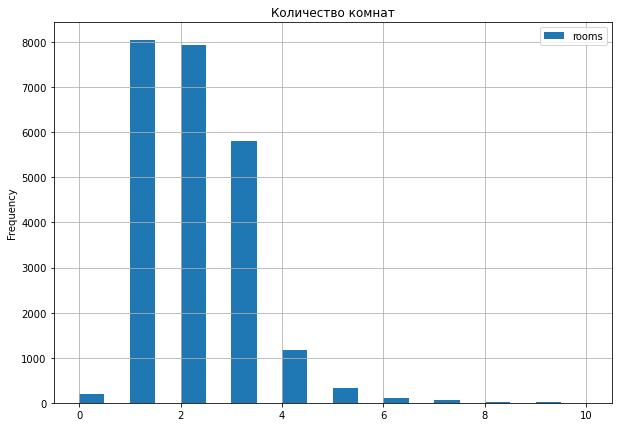

In [27]:
data.plot(y = 'rooms', kind = 'hist', bins = 20, grid=True, range = (0,10), figsize = (10,7), title='Количество комнат')
data['rooms'].describe()

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

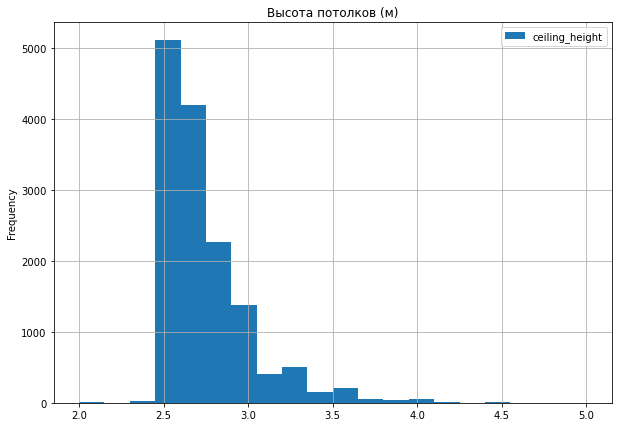

In [28]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 20, range = (2,5), grid=True, figsize = (10,7), title='Высота потолков (м)')
data['ceiling_height'].describe()

<b>Выводы</b>
1. Общая площадь в нашей выборке колеблется от 12 до 900 квадратных метров, среднее значение - 60, а медиана - 52 квадратных метра, что соответствует стандартной 1-2 комнатной квартире. В целом, ожидаемое распределение. Выбросы не сильно влияют на общую картину. 
2. Медианное значение равно 4.6 млн. рублей, цена представлена в диапазоне от 12 тысяч до 763 млн. рублей. Картина вполне реальная, видим, что 12 тыс. - это выброс, количество квартир с ценой выше медианной идет на спад.
3. Больше всего в выборке однокомнатных и двухкомнатных квартир. Квартиры в которых больше 4 комнат встречаются редко.
4. В среднем высота потолков 2.5 метра, с данными все в порядке.

<b>Шаг 2.</b> Теперь изучим время продажи квартир.

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

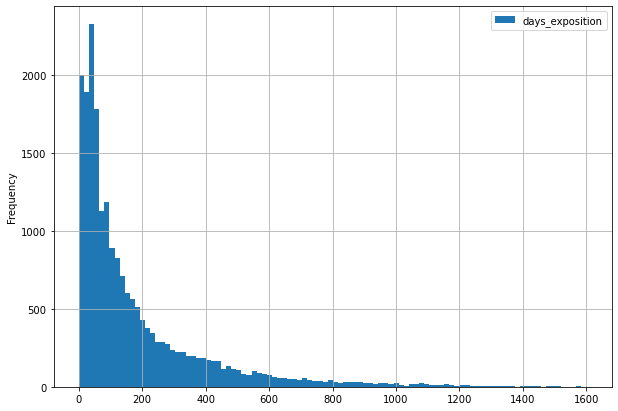

In [29]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,1600), figsize = (10,7))
data['days_exposition'].describe()

Среднее - 156 дней, медиана - 74 дня. Нужно понять, какой период продажи квартир считать обычным, а какой аномальным. 
Судя по этому графику много квартир продаётся в день размещения объявления, есть те, что не продаются более 4 лет. 

Следует построить еще один график от 0 до 200 дней для более подробной картины быстрых продаж. 

<AxesSubplot:ylabel='Frequency'>

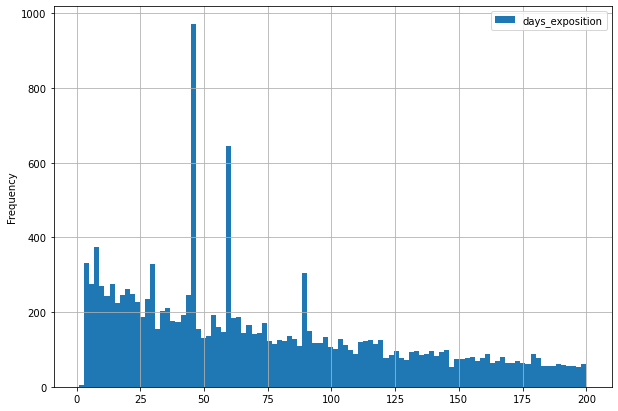

In [30]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200), figsize = (10,7))

На этом графике видны выбросы - 7, 30, 45, 60 и 90 дней. Возможно, объявления удалялись автоматически по этим срокам. В целом, картина правдоподобная, квартиры чаще продаются в первые 200 дней (новые объявления при поиске обычно выдаются первыми). Можно считать, что необычно быстро по выборке квартиры не продавались.

Построим диаграмму размаха, чтобы определить аномально долгие продажи.

(0.0, 1000.0)

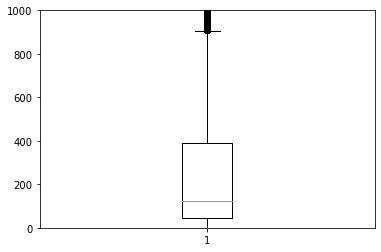

In [31]:
data['days_exposition'] = data['days_exposition'].fillna(10000).astype(int)
plt.boxplot(data['days_exposition'])
plt.ylim(0,1000)

Видим, что продажу, занимающую более 900 дней можно считать аномальной.

In [32]:
data.sort_values(by = 'days_exposition')['days_exposition'].head(10)

1632     1
16212    2
16053    2
13061    2
19049    3
21799    3
7447     3
15421    3
5395     3
9014     3
Name: days_exposition, dtype: int32

In [33]:
data.loc[[1632]]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,weekday_exp,month_exp,year_exp,floor_category,living_area_ratio,kitchen_area_ratio
1632,19,4000000,49.900002,2019-05-01,2,2.5,9.0,25.0,1,True,False,False,10.0,0,Санкт-Петербург,13567.0,14384.0,1,20.0,1,681.0,1,80160,2,5,2019,первый,0.501002,0.200401


<AxesSubplot:ylabel='Frequency'>

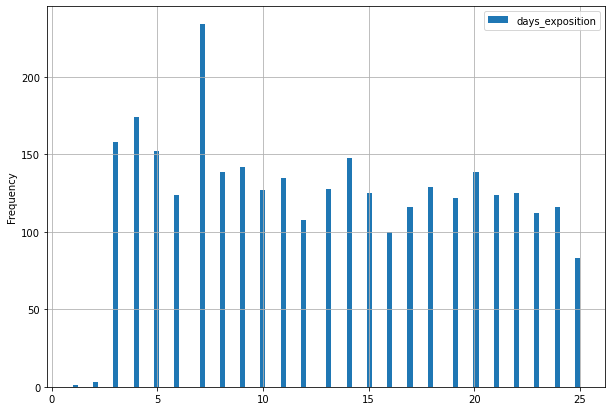

In [34]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,25), figsize = (10,7))

<b>Шаг 3.</b> Уберем редкие и выбивающиеся значения.

In [35]:
new_data = data.query('days_exposition >= 3 and days_exposition != 7 and days_exposition != 30 and days_exposition != 45 and days_exposition != 60 and days_exposition != 90')

Построим новую диаграмму размаха и гистограммы.

<AxesSubplot:ylabel='Frequency'>

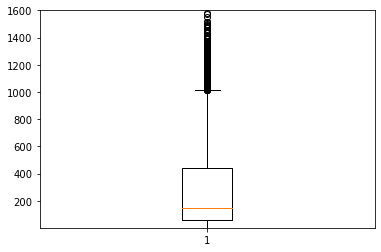

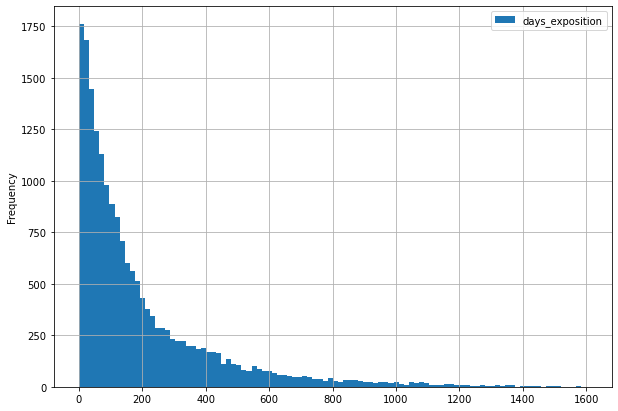

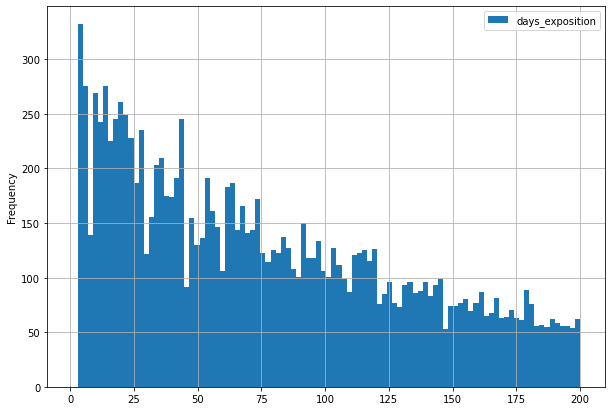

In [36]:
plt.boxplot(new_data['days_exposition'])
plt.ylim(1,1600)

new_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,1600), figsize = (10,7))
new_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200), figsize = (10,7))



Нормальные значения теперь располагаются в диапазоне от 3 до 1000 дней.

In [37]:
len(new_data)/len(data)

0.9126427061310782

In [38]:
new_data = new_data.query('rooms <= 8 and rooms != 0 and total_area <= 300 and last_price <= 40000000')

In [39]:
len(new_data)/len(data)

0.8967441860465116

По графикам выбросы больше, но оставим хотя бы такие границы, чтобы избежать искажения в дальнейшей работе.

### Проверка гипотезы о зависимости цены от ряда факторов

- От площади квартиры:

In [40]:
#создаем сводную таблицу 
area = new_data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
area.columns = ['mean', 'count', 'median']
area

,mean,count,median
total_area,,,
12.000000,2400000.0,1,2400000.0
13.000000,2350000.0,3,1850000.0
13.200000,1686000.0,1,1686000.0
14.000000,1190000.0,1,1190000.0
15.000000,1550000.0,1,1550000.0
...,...,...,...
277.600006,22160000.0,1,22160000.0
281.100006,24900000.0,1,24900000.0
284.000000,26450000.0,1,26450000.0


<AxesSubplot:xlabel='total_area'>

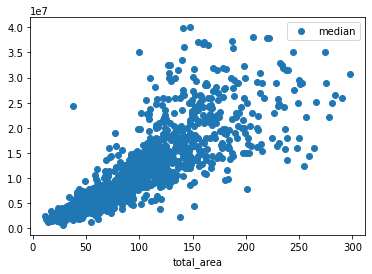

In [41]:
#строим диаграмму рассеяния
area.plot(y = 'median', style = 'o')

In [42]:
#считаем коэффициент корреляции
new_data['total_area'].corr(new_data['last_price'])

0.785149230817515

_Зависимость сильная, чем больше площадь, тем выше цена._

- От числа комнат:

In [43]:
rooms = new_data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
rooms.columns = ['mean', 'count', 'median']
rooms

,mean,count,median
rooms,,,
1,3.837683e+06,7280,3600000
2,5.539142e+06,7191,4800000
3,7.704205e+06,5289,6200000
4,1.105221e+07,1061,8950000
5,1.478331e+07,267,12780000
6,1.803165e+07,77,16900000
7,2.002676e+07,37,18000000
8,1.808167e+07,6,17250000


0.5040714198776661

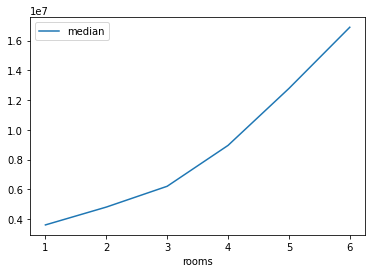

In [44]:
rooms.query('count > 50').plot(y = 'median')

new_data['rooms'].corr(new_data['last_price'])

_Чем больше комнат, тем выше цена, выраженная зависимость_

- От удаленности от центра:

-0.34373492553162743

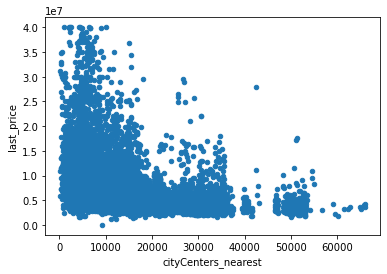

In [45]:
new_data.plot(kind = 'scatter', y = 'last_price', x = 'cityCenters_nearest')
new_data['cityCenters_nearest'].corr(new_data['last_price'])

_Чем больше расстояние от центра, тем ниже цена, но зависимость слабая._

- От этажа:

In [46]:
floor_category = new_data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
floor_category.columns = ['mean', 'count', 'median']
floor_category

,mean,count,median
floor_category,,,
другой,6.213737e+06,15596,4897000
первый,4.640592e+06,2633,3950000
последний,5.807708e+06,2979,4350000


_По таблице видно, что квартиры на первом этаже обычно дешевле._

- От даты размещения:

<AxesSubplot:title={'center':'По годам'}, xlabel='year_exp'>

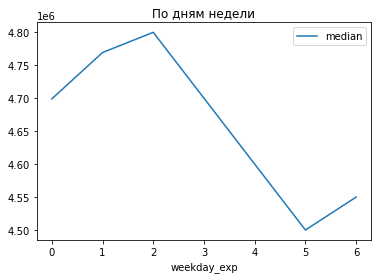

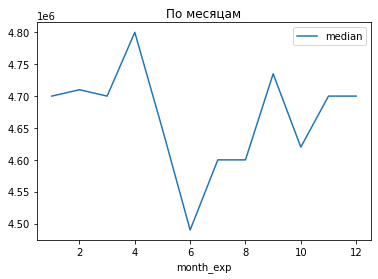

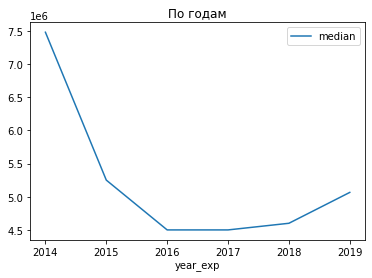

In [47]:
weekday_exp = new_data.pivot_table(index = 'weekday_exp', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
weekday_exp.columns = ['mean', 'count', 'median']
weekday_exp.plot(y = 'median', title='По дням недели')

month_exp = new_data.pivot_table(index = 'month_exp', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
month_exp.columns = ['mean', 'count', 'median']
month_exp.plot(y = 'median', title='По месяцам')

year_exp = new_data.pivot_table(index = 'year_exp', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
year_exp.columns = ['mean', 'count', 'median']
year_exp.plot(y = 'median', title='По годам')


- _со вторника по пятницу цена падает, в выходные поднимается_

- _выше всего цены в объявлениях, размещенных в апреле, с апреля по июнь цена опускается до минимальной, затем наблюдается скачкообразный рост с пиком в сентябре_

- _с 2014 по 2016 год наблюдается снижение цен на квартиры, в 2017 начался рост_


### Территория с самой высокой стоимостью жилья

Выберем 10 населённых пунктов с наибольшим числом объявлений, посчитаем среднюю цену квадратного метра.

In [48]:
local = new_data.pivot_table(index = 'locality_name', values = 'sq_meter_price', aggfunc=['count', 'mean'])
local.columns = ['count', 'mean']
local = local.sort_values('count', ascending = False).head(10)
local

,count,mean
locality_name,,
Санкт-Петербург,14195,111707.624163
посёлок Мурино,452,84887.544248
посёлок Шушары,387,78639.976744
Всеволожск,359,68637.356546
Пушкин,343,103712.571429
Колпино,302,75639.970199
посёлок Парголово,283,90541.653710
Гатчина,280,68303.775000
деревня Кудрово,251,91934.888446


Выделим пункты с самой высокой и низкой стоимостью жилья.

In [49]:
local[local['mean']==local['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,14195,111707.624163


In [50]:
local[local['mean']==local['mean'].min()]

,count,mean
locality_name,,
Выборг,207,58207.410628


Самая высокая стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге, самая низкая - в Выборге.

Посмотрим, как цена зависит от удалённости от центра Петербурга.

Созданим сводную таблицу, отражающую удаленность от центра в км и среднюю цену для каждого километра.

In [51]:
new_data['cityCenters_nearest_km'] = new_data['cityCenters_nearest']/1000
spb = new_data.query('locality_name == "Санкт-Петербург"')
spb_km = spb.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc = 'mean')
spb_km

<ipython-input-51-bda42c07f25f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['cityCenters_nearest_km'] = new_data['cityCenters_nearest']/1000


,last_price
cityCenters_nearest_km,
0.181,31099000.0
0.208,5800000.0
0.215,10990000.0
0.287,9590000.0
0.291,11500000.0
...,...
28.644,4775000.0
28.806,4370000.0
29.263,4850000.0


<AxesSubplot:xlabel='cityCenters_nearest_km'>

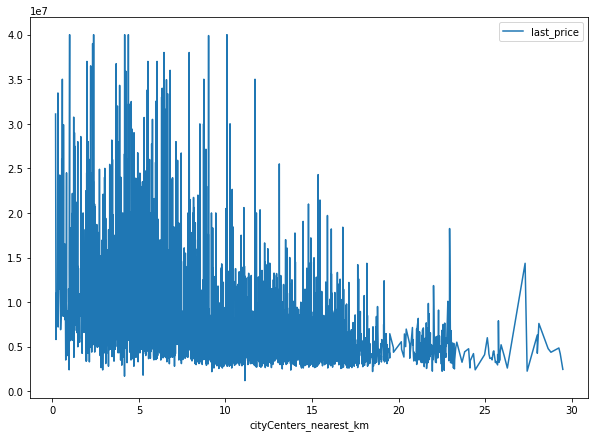

In [52]:
spb_km.plot(figsize = (10,7))

График средней цены резко меняется на 8 км, будем считать что это и есть центр.

In [53]:
spb_center = spb.query('cityCenters_nearest_km <= 8')

### Изучение параметров по центру Санкт-Петербурга

Пройдемся по тем же параметрам, что рассматривали в общей выборке: площадь, цена, число комнат, высота потолков.

count    3265.000000
mean       84.384888
std        40.673985
min        12.000000
25%        55.200001
50%        75.500000
75%       103.000000
max       297.500000
Name: total_area, dtype: float64

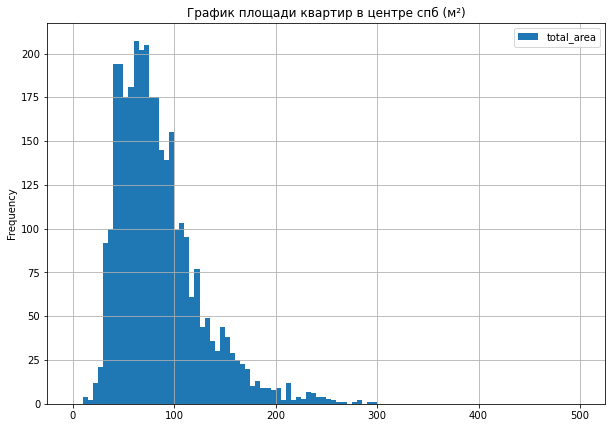

In [54]:
spb_center.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (10,7), range = (0,500), title='График площади квартир в центре спб (м²)')
spb_center['total_area'].describe()

Среднее и медиана по площади квартир в центре Питера больше, чем по общей выборке. Среднее увеличилось на 33.5 кв. метра, а медиана на 24 кв. метра.

count    3.265000e+03
mean     1.106237e+07
std      6.936838e+06
min      1.600000e+06
25%      6.500000e+06
50%      8.800000e+06
75%      1.310000e+07
max      4.000000e+07
Name: last_price, dtype: float64

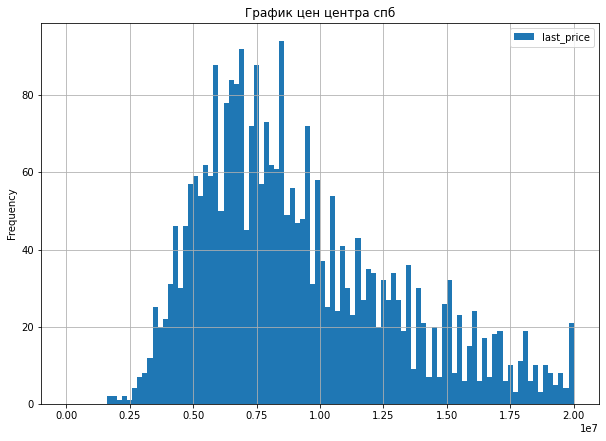

In [55]:
spb_center.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,20000000), figsize = (10,7), title='График цен центра спб')
spb_center['last_price'].describe()

Судя по описанию в центре можно найти квартиру по цене от 1.6 млн. Среднее и медиана 8.8 и 11 млн. соответственно. 

count    3265.000000
mean        2.721286
std         1.260297
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: rooms, dtype: float64

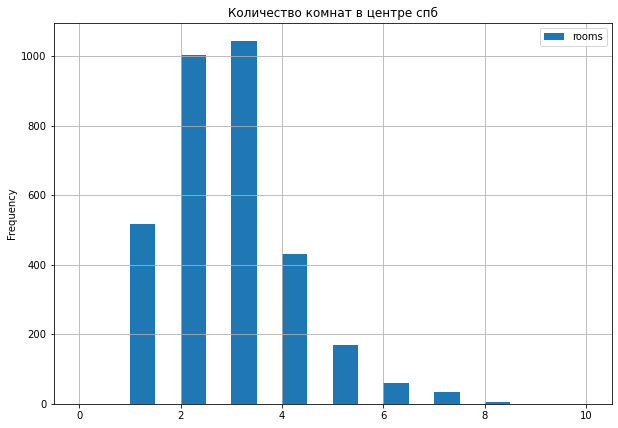

In [56]:
spb_center.plot(y = 'rooms', kind = 'hist', bins = 20, grid=True, range = (0,10), figsize = (10,7), title='Количество комнат в центре спб')
spb_center['rooms'].describe()


В общей выборке больше всего было двухкомнатных квартир, в центре спб - трехкомнатных.

count    2137.000000
mean        3.091970
std         0.886307
min         2.000000
25%         2.800000
50%         3.000000
75%         3.250000
max        32.000000
Name: ceiling_height, dtype: float64

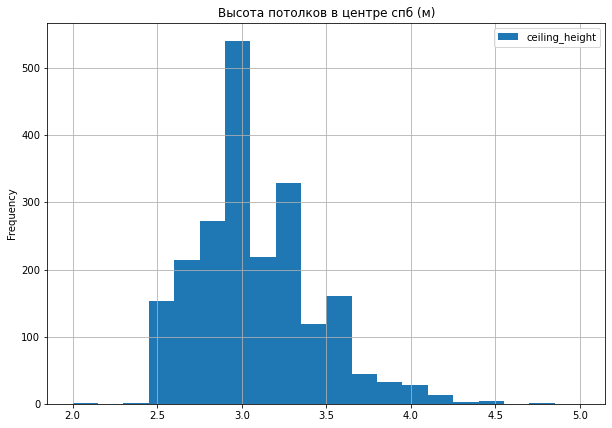

In [57]:
spb_center.plot(y = 'ceiling_height', kind = 'hist', bins = 20, range = (2,5), grid=True, figsize = (10,7), title='Высота потолков в центре спб (м)')
spb_center['ceiling_height'].describe()

Потолки тоже выше. Среднее и медиана в общей выборке 2.77 и 2.65 м, в центре - 3 и 3. 
Квартира с самым высоким потолком в выборке, однако, расположена не в центре.

### Проверка гипотезы о зависимости цены в центре Спб от ряда факторов

- Зависимость цены в центре от кол-ва комнат:

In [58]:
rooms_spb = spb_center.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
rooms_spb.columns = ['mean', 'count', 'median']
rooms

,mean,count,median
rooms,,,
1,3.837683e+06,7280,3600000
2,5.539142e+06,7191,4800000
3,7.704205e+06,5289,6200000
4,1.105221e+07,1061,8950000
5,1.478331e+07,267,12780000
6,1.803165e+07,77,16900000
7,2.002676e+07,37,18000000
8,1.808167e+07,6,17250000


0.43836041639075723

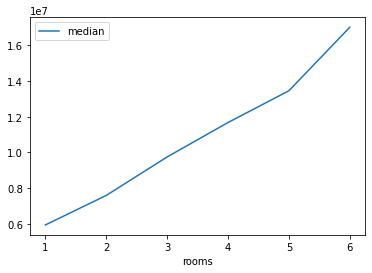

In [59]:
rooms_spb.query('count > 50').plot(y = 'median')
spb_center['rooms'].corr(spb_center['last_price'])

_Коэффициент немного меньше, чем в общей выборке._

- Зависимость от этажа:

In [60]:
floor_category_spb = spb_center.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
floor_category_spb.columns = ['mean', 'count', 'median']
floor_category_spb

,mean,count,median
floor_category,,,
другой,1.150793e+07,2341,9300000
первый,7.951748e+06,362,6470000
последний,1.121006e+07,562,8900000


_Отличий нет, квартиры на первом этаже дешевле всегда._

- Зависимость от удаленности от центра:

-0.0711569536195612

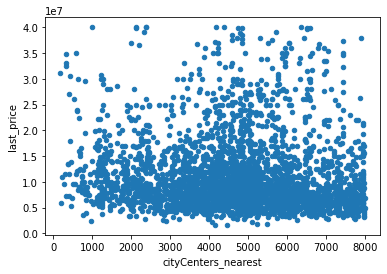

In [61]:
spb_center.plot(kind = 'scatter', y = 'last_price', x = 'cityCenters_nearest')
spb_center['cityCenters_nearest'].corr(spb_center['last_price'])

_Зависимость очень маленькая, потому что мы и так выбрали квартиры только в центре Петербурга. Результат ожидаем._

- Зависимость от дня недели, месяца и года размещения объявления:

<AxesSubplot:xlabel='year_exp'>

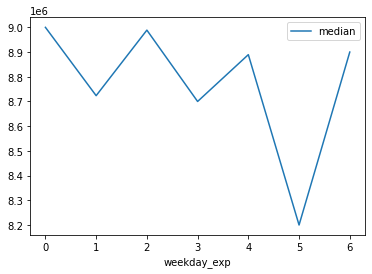

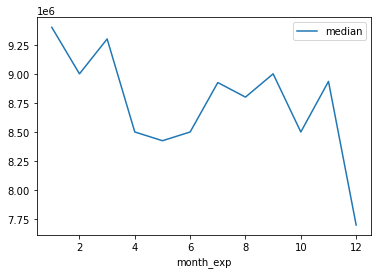

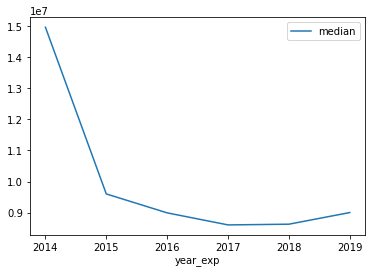

In [62]:
weekday_exp_spb = spb_center.pivot_table(index = 'weekday_exp', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
weekday_exp_spb.columns = ['mean', 'count', 'median']
weekday_exp_spb.plot(y = 'median')

month_exp_spb = spb_center.pivot_table(index = 'month_exp', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
month_exp_spb.columns = ['mean', 'count', 'median']
month_exp_spb.plot(y = 'median')

year_exp_spb = spb_center.pivot_table(index = 'year_exp', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
year_exp_spb.columns = ['mean', 'count', 'median']
year_exp_spb.plot(y = 'median')


_1. Цена квартир в Петербурге поднимается с пт и падает к пн, наблюдаются пики во вт и чт._

_2. Цены в январе и марте самые высокие, снижаются к маю, затем наблюдаются пики роста в июле, сентябре и ноябре._

_3. Цены с 2014 года по 2017 стремительно снижались, затем начали расти. Здесь график практически не отличается от общей выборки._

## Общий вывод



В ходе проведенного исследования мы проверили пять гипотез на общей выборке. Также была создана отдельная выборка по территории с наиболее высокими ценами на квартиры (центр Санкт-Петербурга). Мы установили следующее:

- <b>Стоимость квартир значительно зависит от площади квартиры (r = 0.79).</b> Чем больше площадь, тем выше цена.
- <b>Стоимость квартиры зависит от числа комнат(r = 0.5, total; r = 0.44, spb center).</b> Чем больше комнат, тем выше цена.
- <b>Стоимость квартиры меньше всего зависит от удаленности от центра (r = -0.34, total; r = -0.07, spb center). </b>Чем больше расстояние от центра, тем ниже цена. При этом в центре Петербурга радиусом 8 км эта зависимость вообще не прослеживается.
- <b>Стоимость квартиры зависит от этажа, на котором расположена квартира.</b> На первом этаже квартиры всегда стоят меньше, независимо от расположенности дома.
- <b>Стоимости квартиры зависит от даты размещения объявления. </b>По данным общей выборки со вторника по пятницу цена стремительно падает, при этом в центре Петербурга цнаблюдаются пики роста во вторник и четверг. Набирает рост цена и обеих выборках в выходные. По общей выборке самая высокая цена наблюдается в апреле, по центру Петербурга - в январе. Самый низкий показатель по общей выборке в июне, по центру спб - в декабре. Заметно, что цены с 2014 года по 2017 стремительно снижались, в 2018 начали расти.


Кроме того, при помощи диаграммы размаха мы выявили, что <b>нормальные значения продажи квартир варьируются от 3 до 1000 дней</b>. 

Самая <b>высокая</b> стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений в <b>Санкт-Петербурге</b>, самая <b>низкая</b> - в <b>Выборге</b>.


